<b><font size=20, color='#A020F0'>Class Notebook 2</font></b>

## Welcome to your second in-class jupyter notebook activity!
In this notebook you'll get more practice with scipy. Specifically, you'll be working with the 800,000 year CO$_{2}$ record from the European Project for Ice Coring in Antarctica (EPICA) Dome C ice cores. EPICA ran from 1995-2004 with the goal of extending the 400,000 year Vostok ice core record by reaching even deeper (>3km! Deeper ice=older ice in general) ice in the Antarctic ice sheet. You can find a link to the original paper here: [Eight Glacial Cycles from an Antarctic Ice Core](https://www.nature.com/articles/nature02599). However, we'll be working with some slightly updated data, and you can find that publication here: [Bereiter et al., 2015](http://onlinelibrary.wiley.com/doi/10.1002/2014GL061957/abstract). 

---

<b><font color='red'>Due Date: 30 September 2024 @ 9 am</font></b><br>

<b>How you will turn in this assignment</b><br> When you are ready to turn in your notebook, do the following:
1. Save your notebook and make sure your results are visible (cells have been executed)
2. Open a terminal and navigate to your local `aos573_completed_assignments` repository
3. Move or copy your completed in-class notebook into your `Class_Notebooks` directory
4. `add` and `commit` your completed notebook
5. Finally, `push` your changes to your remote `aos573_completed_assignments` repository: `git push finished_work main` (you'll need to enter your username and personal access token)
6. <b><font color='red'>REMINDER: DO NOT TRACK OR PUSH THE DATA USED IN THE NOTEBOOK</font></b>

---

# 1. Downloading and looking at the data

The EPICA Dome C ice core provides a record of atmospheric CO$_{2}$ over the last 800,000 years. Run the command below to download the data.

```bash
!curl -O https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt
```

Open up the `.txt` file you downloaded (double-click on it in the left pane) and take a look at the frontmatter. There is a lot of information there!

Some things that will probably help:

1. `age_gas_calBP` is the age of the gas that was measured in calendar years before present (BP=before present). Please keep in mind that 'present' in this context means 1950, so if you see some negative ages that means they are dates _after_ 1950! Think of the ages as the time the measurement was taken (relative to 1950).
2. `co2_ppm` is the atmospheric CO$_{2}$ (in ppm) at a given time
3. `co2_1s_ppm` is the 1-sigma mean (basically the standard deviation)

In [22]:
# !curl -O https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt

### Q1.1 Reading in your data
Use numpy's `genfromtxt()` (we'll get into Pandas next week!) to read in the ice core data. You'll need to figure out the exact parameters in order to only read in the data and not the header. Give the columns of your data some names using the 'names' argument in `genfromtxt`

In [2]:
import numpy as np
data = np.genfromtxt('antarctica2015co2composite.txt', skip_header = 138)
age_gas_calBP = data[:,0]
co2_ppm = data[:,1]
co2_1s_ppm = data[:,2]

### Q1.2 Time bounds
What are the time bounds for your data, i.e. what are the _absolute_ years that the first and last samples were taken (i.e., _not_ relative to 1950)? 

In [3]:
a = (age_gas_calBP[-1])
years = a - 1950
years

803718.87

### Q1.3 Plotting your data
Make a plot of atmospheric CO$_{2}$ over the length of the record vs the calendar age in thousands of years BP. Reverse your x-axis so that time goes from oldest calendar age on the _left_ and youngest calendar age on the _right_. Give your plot a title and x and y axis labels that include units. 

Text(0.5, 1.0, 'Co2 Parts Per Million each Year')

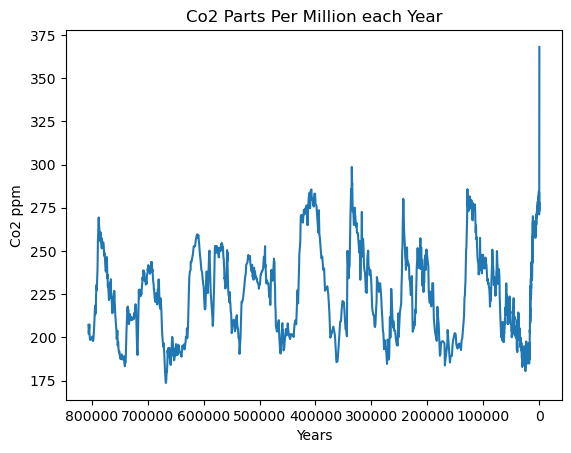

In [4]:
import matplotlib.pyplot as plt
plt.plot(age_gas_calBP, co2_ppm)
plt.gca().invert_xaxis()
plt.xlabel('Years')
plt.ylabel('Co2 ppm')
plt.title('Co2 Parts Per Million each Year')

### Q1.4 Data bounds and mean
What are the maximum and minimum values of the CO$_{2}$ record and _when_ do they occur? What is the mean CO$_{2}$ value over the record?

In [5]:
print (max(co2_ppm))
print (min(co2_ppm))
print (co2_ppm.mean())

368.02
173.71
235.56669121514994


### Q1.5 Making a histogram
Make a histogram of the CO$_{2}$ record using [plt.hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html). Use the `bins` argument in `plt.hist()` to set your histogram bins from 180 to 380 by 10 (you can exclude 380). Add a vertical line on the plot (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)) indicating where the mean CO$_{2}$ value is. Give your plot a title and x and y axis labels. Then answer the following questions:

1. Compute the [skewness](https://en.wikipedia.org/wiki/Skewness) of your data using `scipy.stats.skew`. Are your data normally distributed?
2. What is the median CO$_{2}$ value? Is it different from the mean CO$_{2}$ value?

Text(0.5, 1.0, 'Number of Measurements with each Co2 PPM')

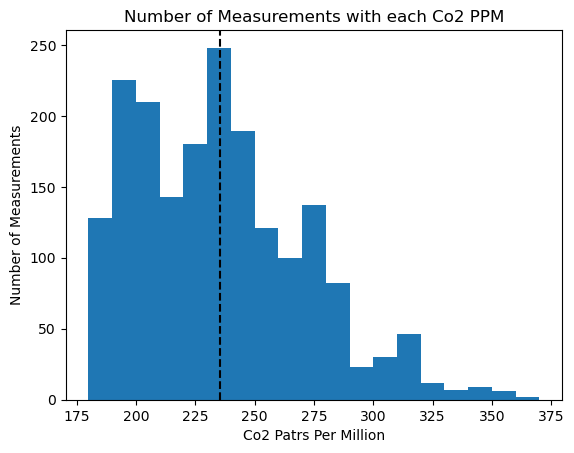

In [6]:
bins = np.arange(180, 380, 10)
plt.hist((co2_ppm), bins)
plt.axvline(x = 235.56, ymin = 0, ymax = 400, c = 'black', linestyle = '--')
plt.xlabel('Co2 Patrs Per Million')
plt.ylabel('Number of Measurements')
plt.title('Number of Measurements with each Co2 PPM')

In [7]:
import scipy.stats as sp
print(sp.skew(co2_ppm))
np.median(co2_ppm)

0.7024796681641186


232.46

---

# 2. Working with your data

### Q2.1 Interpolating
If you want to apply filtering or do a fourier transform on your data, your sample spacing must be constant. The times in the EPICA ice core record are not constantly spaced. To get around this, interpolate your CO$_{2}$ data so that you have points that are evenly spaced every 1000 years. Your new times should start at -50 and end at 805050 (make sure this last time is _included_). Use a [Cubic Hermite Spline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicHermiteSpline.html#scipy.interpolate.CubicHermiteSpline) to do the interpolation. 

><b><font color='green'>Hint:</font></b> You'll need to use [numpy.gradient](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) for the derivatives!

In [8]:
from scipy.interpolate import CubicHermiteSpline

In [9]:
dx = np.gradient(co2_ppm, age_gas_calBP)
chs = CubicHermiteSpline(age_gas_calBP, co2_ppm, dx)
years = np.arange(-50, 805050, 1000)
int_data = chs(years)

### Q2.2 Plotting again
Make a plot of your interpolated CO$_{2}$ data compared to the original CO$_{2}$ data. Go ahead and copy your plot code from Q1.3 and just add a second line for the interpolated data (make sure it is a different color) and a legend showing which line is which.

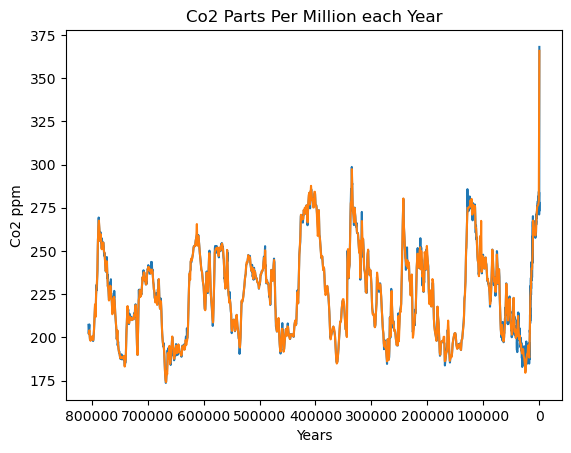

In [10]:
plt.plot(age_gas_calBP, co2_ppm)
plt.gca().invert_xaxis()
plt.xlabel('Years')
plt.ylabel('Co2 ppm')
plt.title('Co2 Parts Per Million each Year')
plt.plot(years, int_data)

### Q2.3 Filtering
Lowpass filter your interpolated data (use the butterworth filter I showed you in class) so that only signals with periods greater than 25,000 years are kept. Plot your result vs the original data (just copy your code from Q2.2 and adjust it for this problem).

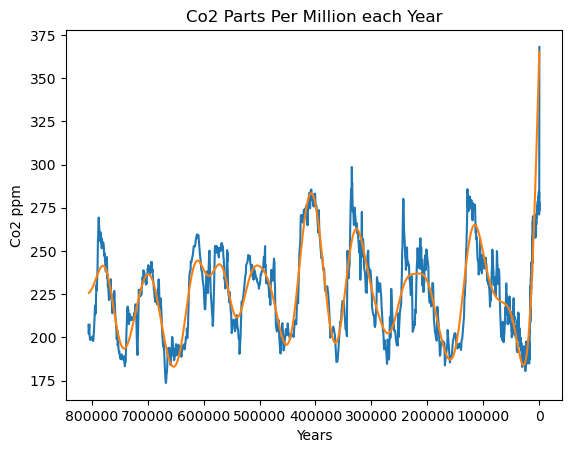

In [11]:
import scipy.signal as signal
bfilt=signal.butter(5, 1/25, 'lowpass',output='sos') #design the filter--order of filter, cutoff frequency (units of 1/time!!!), type, output type
co2_filtered=signal.sosfiltfilt(bfilt,int_data) 
plt.plot(age_gas_calBP, co2_ppm)
plt.gca().invert_xaxis()
plt.xlabel('Years')
plt.ylabel('Co2 ppm')
plt.title('Co2 Parts Per Million each Year')
plt.plot(years, co2_filtered)

### Q2.4 Fourier Transform

Linearly detrend your filtered data. Then apply a fourier transform and plot it (follow what we did in the class notes). Make sure your plot has a title and x and y axis labels. Your x-axis label should have units.

What is the period (1/frequency), in kyr (1 kyr=1000 years), of the tallest spectral peak?

In [45]:
import scipy.fft as fft
import scipy.signal as sig
detrend = sig.detrend(co2_filtered)
co2_fft=fft.fft(detrend)

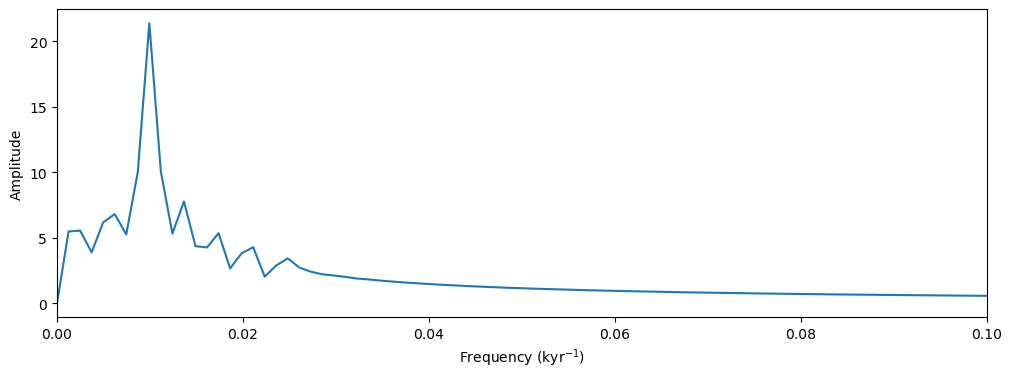

In [52]:
tstep=1 #data is monthly, which is the size of the tstep. For data w/a sampling rate (samples per second), 1 tstep is 1/sampling_rate
N=len(co2_fft) #number of samples (length of data)
freq=fft.fftfreq(N,tstep)[:(N//2)] #get the frequencies for the x axis of the plot; only get the first half--the second half is a mirror image!

#Set up the plot
fig,ax=plt.subplots(figsize=(12,4))
#only plot the absolute values (ffts have real and complex components!)
plt.plot(freq,(2.0/N)*np.abs(co2_fft[0:(N//2)])) #2/N is a normalization factor
plt.xlim(0,0.1)
plt.ylabel('Amplitude')
plt.xlabel('Frequency (kyr$^{-1}$)');

The period of the tallest spectral peak is 100kyr.